In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
dataset = pd.read_excel("CUSTOMER DATA.xlsx")

In [10]:
dataset.isnull().sum().sum()
dataset.duplicated().sum()
dataset['customerID'].duplicated().sum()

0

In [16]:
dataset['TotalCharges'] = dataset['TotalCharges'].replace(" ",'0')
dataset['TotalCharges'] = dataset['TotalCharges'].astype("float") 

In [14]:
def convert(value):
    if value==1:
        return 'yes'
    else:
        return 'no'
dataset['SeniorCitizen'] = dataset['SeniorCitizen'].apply(convert)

In [18]:
dataset.head(3)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<function matplotlib.pyplot.show(close=None, block=None)>

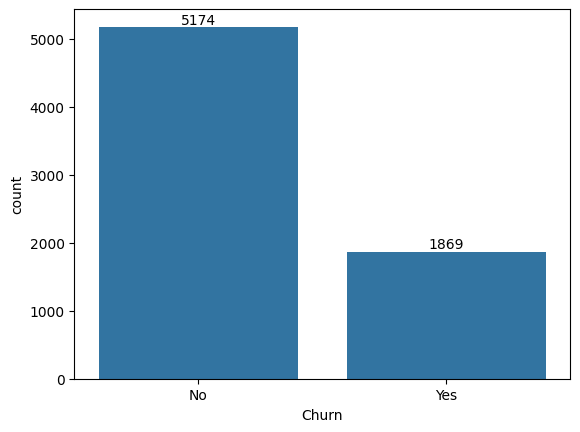

<Figure size 200x200 with 0 Axes>

In [50]:
ax = sns.countplot(x='Churn', data=dataset)
ax.bar_label(ax.containers[0])
plt.figure(figsize=(2,2))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

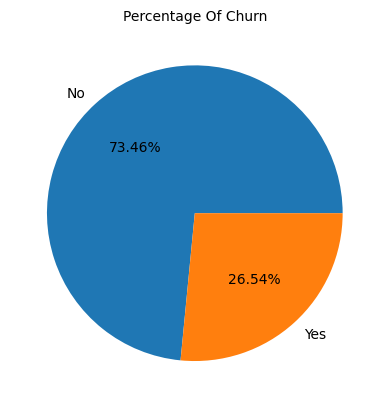

In [47]:
chrun_count = dataset.groupby('Churn').agg({'Churn':'count'})
plt.pie(chrun_count['Churn'], labels=chrun_count.index, autopct="%1.2f%%")
plt.title("Percentage Of Churn", fontsize=10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

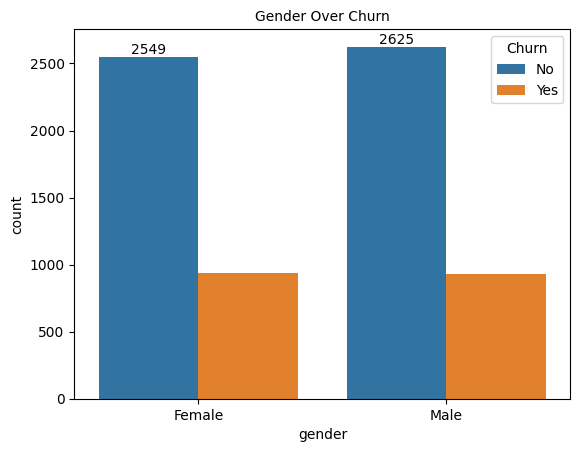

In [48]:
ax = sns.countplot(x='gender', data=dataset, hue='Churn')
ax.bar_label(ax.containers[0])
plt.title("Gender Over Churn",fontsize=10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

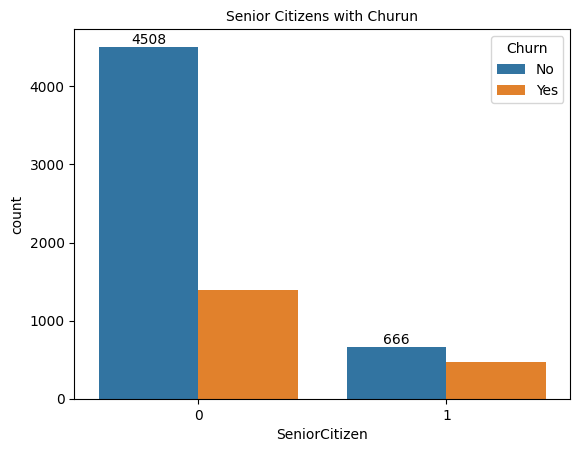

In [52]:
ax = sns.countplot(x='SeniorCitizen', data=dataset, hue='Churn')
ax.bar_label(ax.containers[0])
plt.title("Senior Citizens with Churun",fontsize=10)
plt.show

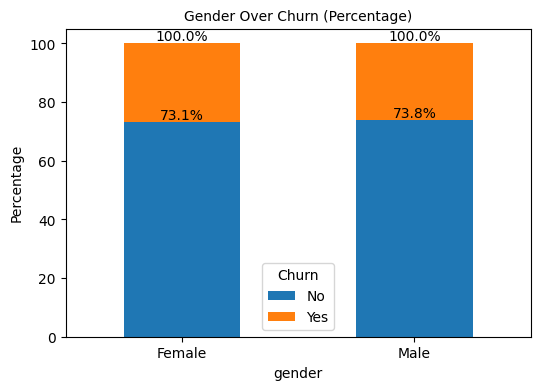

In [58]:
data = dataset.groupby(['gender', 'Churn']).size().unstack(fill_value=0)

# Calculate the percentage of each category
data_percentage = data.div(data.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
ax = data_percentage.plot(kind='bar', stacked=True, figsize=(6, 4))

# Add percentage labels on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

# Set title and labels
plt.title('Gender Over Churn (Percentage)', fontsize=10)
plt.ylabel('Percentage')
plt.xticks(rotation=0)

# Show the plot
plt.show()

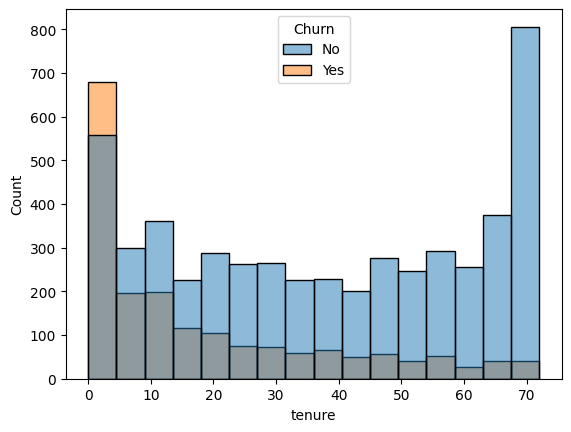

In [59]:
sns.histplot(x='tenure', data=dataset, hue='Churn')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

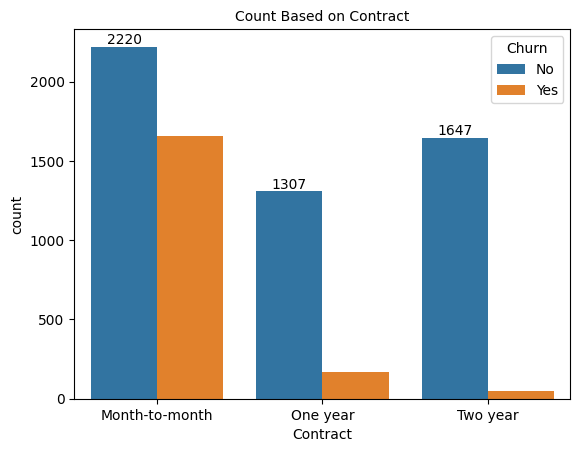

In [63]:
ax = sns.countplot(x='Contract', data=dataset, hue='Churn')
ax.bar_label(ax.containers[0])
plt.title("Count Based on Contract",fontsize=10)
plt.show

In [64]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

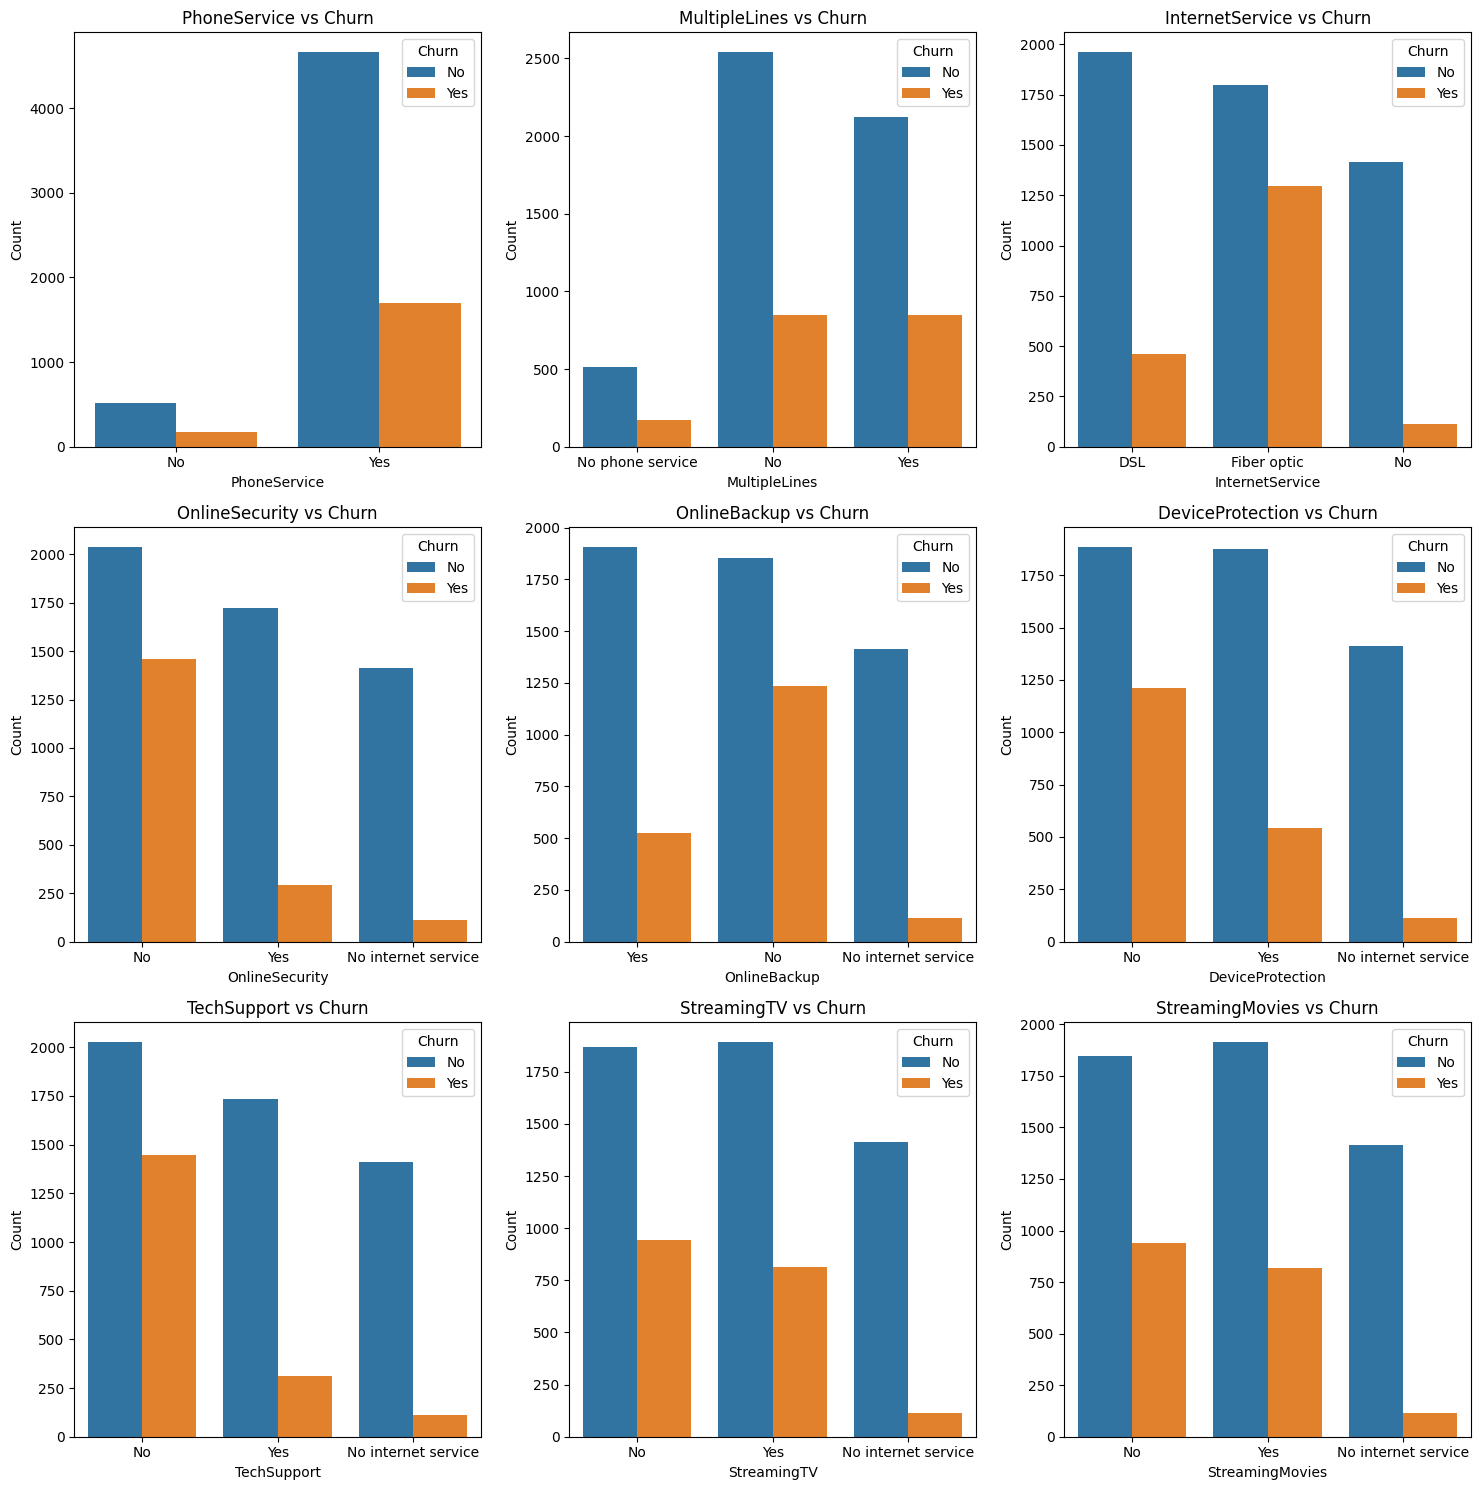

In [66]:
i
# List of service columns
services = ['PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a figure and axes for the subplots (adjust rows and columns to fit the number of services)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))  # 3x3 grid for 9 service plots
axes = axes.flatten()  # Flatten the 2D axes array for easy iteration

# Plot a countplot for each service column
for i, service in enumerate(services):
    sns.countplot(x=service, data=dataset, hue='Churn', ax=axes[i])
    axes[i].set_title(f'{service} vs Churn')
    axes[i].set_xlabel(service)
    axes[i].set_ylabel('Count')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()
